Импорт библиотек и чтение файла

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import random
from collections import Counter

with open('Москва_2021.txt', 'r') as file:
    ages = list(map(int, file.readlines()))
print(ages)

[23, 32, 27, 26, 44, 49, 63, 34, 66, 66, 38, 27, 28, 35, 26, 46, 62, 44, 22, 35, 31, 31, 27, 37, 32, 49, 31, 22, 18, 29, 30, 20, 31, 18, 69, 36, 28, 38, 62, 25, 38, 32, 31, 18, 48, 38, 40, 21, 25, 27, 44, 45, 29, 41, 24, 19, 29, 67, 41, 44, 25, 22, 42, 40, 21, 44, 29, 34, 63, 32, 49, 34, 35, 23, 45, 26, 36, 46, 36, 45, 38, 31, 24, 29, 41, 31, 27, 41, 33, 20, 45, 25, 40, 41, 32, 20, 41, 41, 57, 47, 22, 63, 21, 43, 19, 30, 25, 41, 44, 27, 34, 33, 26, 47, 19, 43, 48, 30, 19, 33, 36, 29, 27, 36, 45, 34, 20, 48, 32, 20, 66, 23, 48, 26, 43, 26, 22, 41, 19, 55, 21, 43, 45, 34, 25, 49, 19, 35, 51, 18, 34, 24, 42, 19, 37, 21, 31, 34, 32, 47, 49, 23, 35, 24, 29, 48, 29, 36, 34, 39, 39, 25, 23, 52, 31, 33, 48, 35, 24, 25, 28, 30, 34, 34, 19, 29, 39, 33, 38, 25, 47, 19, 31, 19, 22, 27, 27, 24, 38, 31, 33, 27, 22, 25, 32, 28, 24, 48, 37, 18, 28, 23, 56, 38, 30, 38, 29, 36, 19, 40, 41, 25, 26, 36, 25, 51, 22, 23, 21, 27, 21, 32, 42, 49, 26, 29, 27, 18, 30, 38, 22, 25, 25, 48, 21, 38, 49, 60, 64, 29,

Задание №1. Для каждой из семи видов зависимостей вычислить средние и экспериментальное значение. Вывести отклонения и тот вид зависимости, которому соответствует min Δ𝑠. Определить, сколько процентов составляют отклонения Δ𝑠 по отношению к общей сумме частот.

In [3]:
ages_frequency = dict(sorted(Counter(ages).items())) # возраст -> количество преступлений
x = list(ages_frequency.keys()) # уникальные возраста (X)
y = list(ages_frequency.values()) # Количество преступлений (Y)
types = ["y = ax + b", "y = ax^b", "y = ab^x", "y = a + b/x", "y = 1/(ax + b)", "y = x/(ax + b)", "y = a ln x + b"]

# Считаем X средние
x_mean = [0] * 7
a = (x[0] + x[-1]) / 2
x_mean[0], x_mean[2], x_mean[4] = round(a,2), round(a,2), round(a,2)
b = (x[0] * x[-1]) ** 0.5
x_mean[1], x_mean[6] = round(b,2), round(b,2)
c = (2 * x[0] * x[-1])/(x[0] + x[-1])
x_mean[3], x_mean[5] = round(c,2), round(c,2)
# print(f'X средние: {x_mean}')

# Считаем Y средние
y_mean = [0] * 7
a = (y[0] + y[-1]) / 2
y_mean[0], y_mean[3], y_mean[6] = round(a,2), round(a,2), round(a,2)
b = (y[0] * y[-1]) ** 0.5
y_mean[1], y_mean[2] = round(b,2), round(b,2)
c = (2 * y[0] * y[-1])/(y[0] + y[-1])
y_mean[4], y_mean[5] = round(c,2), round(c,2)
# print(f'Y средние: {y_mean}')

# Находим экспериментальное значение ys
for i in range(len(x)-1):
    if x[i] <= x_mean[0] <= x[i+1]:
        a1 = i
        a2 = i+1
    if x[i] <= x_mean[1] <= x[i+1]:
        b1 = i
        b2 = i+1
    if x[i] <= x_mean[3] <= x[i+1]:
        c1 = i
        c2 = i+1
ys = [0] * 7
a = y[a1] + (y[a2] - y[a1])/(x[a2] - x[a1])*(x_mean[0] - x[a1])
ys[0], ys[2], ys[4] = round(a,2), round(a,2), round(a,2)
b = y[b1] + (y[b2] - y[b1])/(x[b2] - x[b1])*(x_mean[1] - x[b1])
ys[1], ys[6] = round(b,2), round(b,2)
c = y[c1] + (y[c2] - y[c1])/(x[c2] - x[c1])*(x_mean[3] - x[c1])
ys[3], ys[5] = round(c,2), round(c,2)
# print(f'Ys: {ys}')

# Считаем разницу ys и y_mean
delta_s = []
for i in range(len(y_mean)):
    delta_s.append(abs(y_mean[i] - ys[i]))
# print(f'Δ𝑠: {delta_s}')

# Считаем процент отношения Δ𝑠 к сумме частот
sum_y = sum(y)
delta_s_percent = []
for i in range(len(delta_s)):
    delta_s_percent.append(round(delta_s[i] / sum_y * 100, 2))
# print(f'Δ𝑠%: {delta_s_percent}')

# Определяем вид зависимости, которому соответствует min Δ𝑠
min_delta_s = min(delta_s)
print(f'Минимальное Δ𝑠: {min_delta_s}')
dep_num = delta_s.index(min_delta_s)
print(f'Вид зависимости min Δ𝑠: {types[dep_num]}')

# Вывод
results = []
for i in range(len(x_mean)):
    results.append({
        "Тип зависимости": types[i],
        "x_mean": x_mean[i],
        "y_mean": y_mean[i],
        "ys": ys[i],
        "Δs": delta_s[i],
        "Δs%": delta_s_percent[i]
    })
df = pd.DataFrame(results)
df

Минимальное Δ𝑠: 772.57
Вид зависимости min Δ𝑠: y = a ln x + b


,Тип зависимости,x_mean,y_mean,ys,Δs,Δs%
0,y = ax + b,43.50,33.00,926.00,893.00,2.75
1,y = ax^b,31.97,28.86,805.57,776.71,2.40
2,y = ab^x,43.50,28.86,926.00,897.14,2.77
3,y = a + b/x,23.49,33.00,943.11,910.11,2.81
4,y = 1/(ax + b),43.50,25.24,926.00,900.76,2.78
5,y = x/(ax + b),23.49,25.24,943.11,917.87,2.83
6,y = a ln x + b,31.97,33.00,805.57,772.57,2.38


### Задание №2. 
Определить показатель степени аппроксимирующего многочлена,
соответствующий максимальному значению ряда разностей, не
превышающему 2 % от суммы частот.

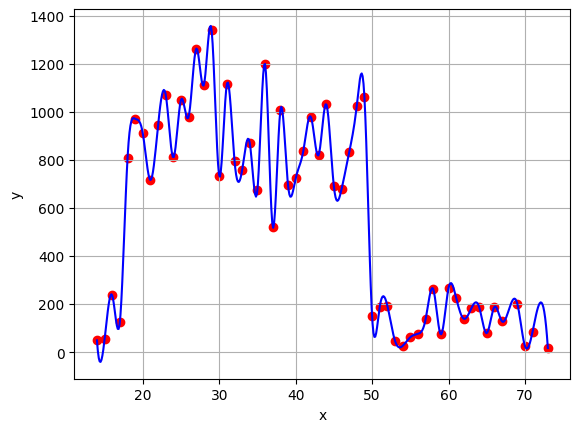

In [11]:
# Строим интерполяцию
from scipy.interpolate import interp1d
plt.scatter(x, y, color='red', label='Исходные данные')

f_interp = interp1d(x, y, kind='cubic')
x_smooth = np.linspace(min(x), max(x), 500)
y_smooth = f_interp(x_smooth)

plt.plot(x_smooth, y_smooth, color='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.show()

Рассчитываем значения функции для равноотстоящих значений аргумента

In [8]:
# Диапазон для интерполяции (равноотстоящие значения x с шагом 1)
x_interp = np.arange(min(x), max(x) + 1, 1)

# Проведем интерполяцию данных, используя логарифмическую модель

u = [math.log(val) for val in x] # расчет u = ln(x)

n = len(x)
sum_u = sum(u)  
sum_y = sum(y)
sum_uy = sum(u[i] * y[i] for i in range(n))  # Сумма u * y
sum_u2 = sum(u[i]**2 for i in range(n))  # Сумма u^2

# Находим коэффициент a
numerator = sum_uy - (sum_u * sum_y) / n  # числитель
denominator = sum_u2 - (sum_u**2) / n  # знаменатель
a = numerator / denominator

# Находим коэффициент b
b = (sum_y / n) - a * (sum_u / n)

print(f"Коэффициенты аппроксимации:")
print(f"a = {a}")
print(f"b = {b}")

# Итоговая модель:
print(f"Модель: y = {a} * ln(x) + {b}")
x_new = np.setdiff1d(x_interp, x)
print(f'Добавленые значения:')

# Рассчитываем для них y
u_new = np.log(x_new)
y_new = a * u_new + b
for elem in range(len(x_new)):
    print(f"X = {x_new[elem]} Y = {y_new[elem]}")

x_new = np.setdiff1d(x_interp, x)
u_new = np.log(x_new)
y_new = a * u_new + b
new_y = []
idx = 0
for i in range(len(x_interp)):
    if i < len(x) and x_interp[i] == x[idx]:  # Если это изначальный x
        new_y.append(y[idx])
        idx += 1
    elif x_interp[i] in x_new:  # Если это новое x, для которого мы вычислили y_new
        new_y.append(y_new[list(x_new).index(x_interp[i])])

print("Обновленный массив y:", new_y)

Коэффициенты аппроксимации:
a = -413.08281569475565
b = 2070.4766614928853
Модель: y = -413.08281569475565 * ln(x) + 2070.4766614928853
Добавленые значения:
X = 68 Y = 327.47053779302223
X = 72 Y = 303.85937926337033
Обновленный массив y: [49, 53, 236, 126, 806, 971, 910, 716, 944, 1071, 810, 1050, 980, 1263, 1113, 1340, 734, 1115, 796, 758, 869, 676, 1198, 522, 1006, 695, 723, 837, 978, 820, 1032, 690, 677, 831, 1026, 1060, 150, 188, 193, 47, 26, 62, 76, 136, 262, 74, 266, 226, 139, 183, 189, 79, 188, 128, np.float64(327.47053779302223), 202, 26, 85, np.float64(303.85937926337033)]


In [ ]:
percent_2 = 0.02 * sum_y # порог 2%
print(f"Сумма частот: {sum_y}")
print(f"2 процента от суммы частот: {percent_2}")
y_diff = []
max_diff = float('inf')  # Начальное значение max_diff больше любого возможного

attempt = 0
while max_diff > percent_2:
    attempt += 1
    if attempt == 1:
        y_diff = [abs(new_y[i] - new_y[i - 1]) for i in range(1, len(new_y))]
    else:
        y_diff = [abs(y_diff[i] - y_diff[i - 1]) for i in range(1, len(y_diff))]
    max_diff = max(y_diff)
    
    if max_diff > percent_2:
        print(f"{attempt}: max_diff = {max_diff}, больше 2%")
    else: print(f"{attempt}: max_diff = {max_diff}, меньше 2%")

print(f"Минимальная разность, менее 2%: {max_diff}")
print(f"Показатель степени: {attempt}")


Сумма частот: 32423
2 процента от суммы частот: 648.46
[4, 183, 110, 680, 165, 61, 194, 228, 127, 261, 240, 70, 283, 150, 227, 606, 381, 319, 38, 111, 193, 522, 676, 484, 311, 28, 114, 141, 158, 212, 342, 13, 154, 195, 34, 910, 38, 5, 146, 21, 36, 14, 60, 126, 188, 192, 40, 87, 44, 6, 110, 109, 60, np.float64(199.47053779302223), np.float64(125.47053779302223), 176, 59, np.float64(218.85937926337033)]
1: max_diff = 910, больше 2%
[179, 73, 570, 515, 104, 133, 34, 101, 134, 21, 170, 213, 133, 77, 379, 225, 62, 281, 73, 82, 329, 154, 192, 173, 283, 86, 27, 17, 54, 130, 329, 141, 41, 161, 876, 872, 33, 141, 125, 15, 22, 46, 66, 62, 4, 152, 47, 43, 38, 104, 1, 49, np.float64(139.47053779302223), np.float64(74.0), np.float64(50.52946220697777), 117, np.float64(159.85937926337033)]
2: max_diff = 876, больше 2%
[106, 497, 55, 411, 29, 99, 67, 33, 113, 149, 43, 80, 56, 302, 154, 163, 219, 208, 9, 247, 175, 38, 19, 110, 197, 59, 10, 37, 76, 199, 188, 100, 120, 715, 4, 839, 108, 16, 110, 7, 24, 